### Attempt to use an ANN to classify images from the MNIST dataset

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Load in MNIST data
Grab MNIST image files and convert them to tensors

In [6]:
# Grab train and test sets
train_data = datasets.MNIST('../Data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('../Data', train=False, download=True, transform=transforms.ToTensor())

train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
# Explore first record of dataset
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
# Explore size of an image tensor
image,label = train_data[0]
image.shape
# The "1" represents a single color channel, since we have a grayscale image

torch.Size([1, 28, 28])

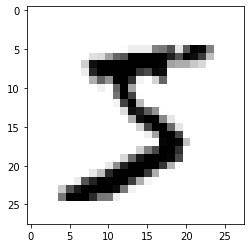

In [15]:
# Visualize image
plt.imshow(image.reshape(28,28), cmap='gist_yarg')

In [18]:
# Load in batches with data loader
# shuffle=True since some datasets are ordered. We don't want to train on batches of all 0s, then switch to 1s suddenly and have the model struggle to learn. Data is shuffled after each epoch
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
# Larger batch size for test set since we are only predicting. We don't care if the test data is shuffled or not
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [19]:
# Grab a batch of images to visualize
from torchvision.utils import make_grid
for imgs,lbls in train_loader:
    break
imgs.shape  # Just grab the first batch
# # imgs, color channel, width, height

torch.Size([100, 1, 28, 28])

Labels:  [3 4 1 8 1 1 1 1 1 4 9 0]


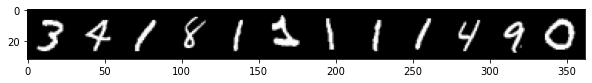

In [25]:
# Print the first 12 labels
print('Labels: ', lbls[:12].numpy())

# Show the first 12 images
im = make_grid(imgs[:12], nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))  # transpose images from CWH to WHC (Width, Height, Color channel)